In [234]:
#example coordinate transform on the event level for pone

In [185]:
import numpy as np
import pandas as pd
import astropy
import matplotlib.pyplot as plt
import tables

In [186]:
from astropy import coordinates
from astropy import units as u
from astropy.coordinates import EarthLocation
from astropy.time import Time

In [187]:
base_dir = '/home/ssclafani//pone/data/'

In [188]:
f = tables.open_file(base_dir + '70_no_reco.hdf5')

In [189]:
zenith = f.root.MCMuon.cols.zenith[:]
azimuth = f.root.MCMuon.cols.azimuth[:]

In [224]:
    PONE = {
        "lon": -123.3656 * u.deg,
        "lat": 48.4284 * u.deg} #48.4284 * u.deg}

In [225]:
loc = EarthLocation(lon= PONE['lon'], lat= PONE['lat'])

In [226]:
times = np.random.uniform(size=len(azimuth), low=53005, high=53371)

In [227]:
t = Time(times, format='mjd')

In [228]:
time = Time("2021-6-21 00:00:00")

In [229]:
coords = astropy.coordinates.AltAz(az=azimuth*u.rad, alt=(np.pi/2 - zenith)*u.rad, 
                                   obstime = t, location=loc)

In [230]:
eq = astropy.coordinates.SkyCoord(coords)
eq.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(167.85979861, -18.11478057), (190.14180023, -45.10181607),
     ( 26.2002548 , -18.10784446), ..., (208.0004644 ,   5.66241547),
     (196.56198513, -51.46330639), (317.41055023,  23.53547119)]>

In [231]:
ra = eq.icrs.ra.rad
dec = eq.icrs.dec.rad

Text(0, 0.5, 'Zenith')

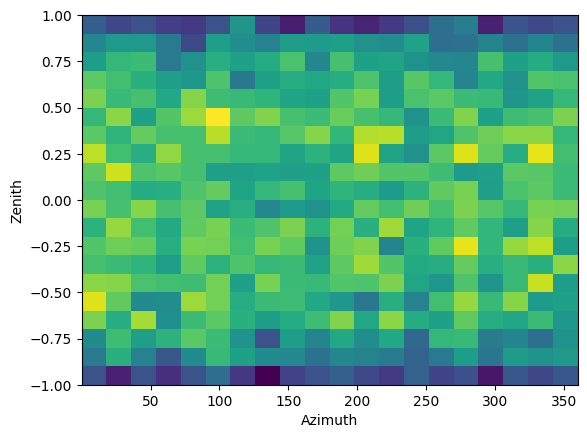

In [232]:
plt.hist2d(np.degrees(azimuth), np.cos(zenith), bins=20);
plt.ylim(-1,1)
plt.xlabel('Azimuth')
plt.ylabel('Zenith')

Text(0, 0.5, 'sin(dec)')

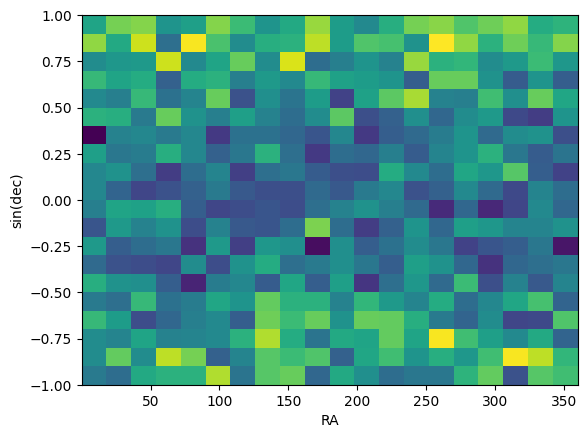

In [233]:
plt.hist2d(np.degrees(ra), np.sin(dec), bins=20);
plt.ylim(-1,1)
plt.xlabel('RA')
plt.ylabel('sin(dec)')